In [6]:
import pandas as pd
import re
import seaborn as sns

In [5]:
df=pd.read_csv('C:/Users/vital/Downloads/Analyst Interview Dataset.csv')

In [29]:
df.head()

,Page,Page Type,Device,Pageviews,Bounce Rate,Avg. Time on Page,Exit %,Transactions,Revenue
0,/,home,desktop,4580,0.45,41,0.17,0,0.00
1,/mortgage.html,rates,desktop,3757,0.13,143,0.42,4235,82286.05
2,/cd.html,rates,desktop,2963,0.13,340,0.66,4010,120781.20
3,/cc/mortgage/loan-calc.html,calculator,mobile,2919,0.13,808,0.81,1773,32179.95
4,/cc/mortgage/loan-calc.html,calculator,desktop,2744,0.10,1120,0.77,1461,26312.61


In [7]:
sns.set_theme()

In [21]:
df['Revenue']=df['Revenue'].replace(',','')

In [28]:
df["Revenue"] = df["Revenue"].str.replace(",","").astype(float)

### Look at overall distributions of dataset

In [38]:
print (df.describe())

         Pageviews  Bounce Rate  Avg. Time on Page       Exit %  Transactions  \
count  8289.000000  8289.000000        8289.000000  8289.000000   8289.000000   
mean     13.578116     0.406445         600.051273     0.766782      2.647123   
std     110.251219     0.440072         754.901131     0.207180     74.374346   
min       1.000000     0.000000           0.000000     0.000000      0.000000   
25%       1.000000     0.000000         202.000000     0.670000      0.000000   
50%       2.000000     0.140000         398.000000     0.840000      0.000000   
75%       4.000000     0.960000         710.000000     0.920000      0.000000   
max    4580.000000     1.000000       18090.000000     1.000000   4235.000000   

             Revenue  
count    8289.000000  
mean       53.417364  
std      1784.559472  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max    120781.200000  


In [12]:
df.groupby("Page Type")["Page Type"].count().sort_values(ascending=False)

Page Type
article         7385
calculator       326
index            176
rates            132
review           115
undefined         51
calc              42
calculators       28
page              17
review-offer       6
best-lenders       3
home               3
search             3
error              2
Name: Page Type, dtype: int64

In [13]:
df.groupby("Device")["Device"].count().sort_values(ascending=False)

Device
mobile     3821
desktop    3412
tablet     1056
Name: Device, dtype: int64

In [46]:
import statsmodels.formula.api as smf

model=smf.ols('Pageviews~Revenue', data=df)
model=model.fit()

In [47]:
model.params
# For every pageview adds $.03 to revenue

Intercept    11.526095
Revenue       0.038415
dtype: float64

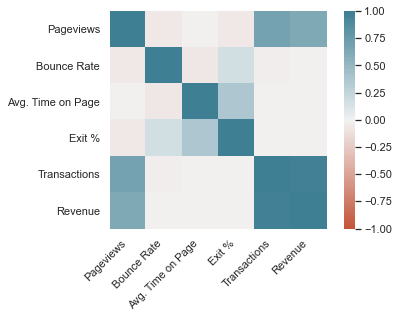

In [72]:
##correlation plot

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

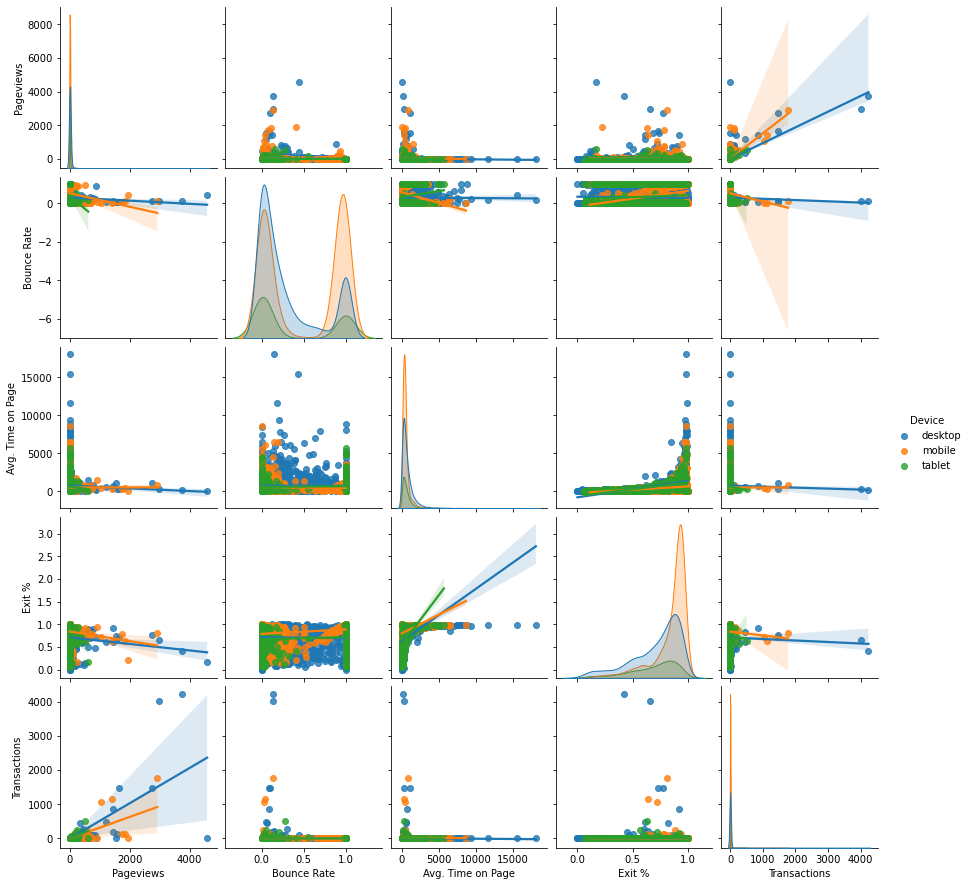

In [8]:
# Numerical Distribution
overview=sns.pairplot(data=df, hue="Device", kind='reg', )

### Look at regression relationship for predicting Revenue


In [86]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [87]:
regr=linear_model.LinearRegression()
regr.fit(X,y)
linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [105]:
X=df[['Transactions', 'Pageviews']]
y=df['Revenue']

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)


In [107]:
lin_reg_mod = LinearRegression()


In [108]:
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)

In [109]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [112]:
print(test_set_r2) # high

print(test_set_rmse) ## too high

0.9601734775847385
246.47601514663864
